In [15]:
from wordcloud import WordCloud # khai báo thư viện word cloud
from wordcloud import ImageColorGenerator # khai báo thư viện ImageColorGenerator từ thư viện word cloud
from wordcloud import STOPWORDS # Khai báo STOPWORD từ thư viện wordcloud
import matplotlib.pyplot as plt # Khai báo thư viện matplotlib
import pandas as pd # khai báo thư viện pandas để đọc file csv
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/spam.csv") # Đọc file csv từ đường dẫn cho trước
print(data.head()) # in ra 5 dòng đầu của file csv

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


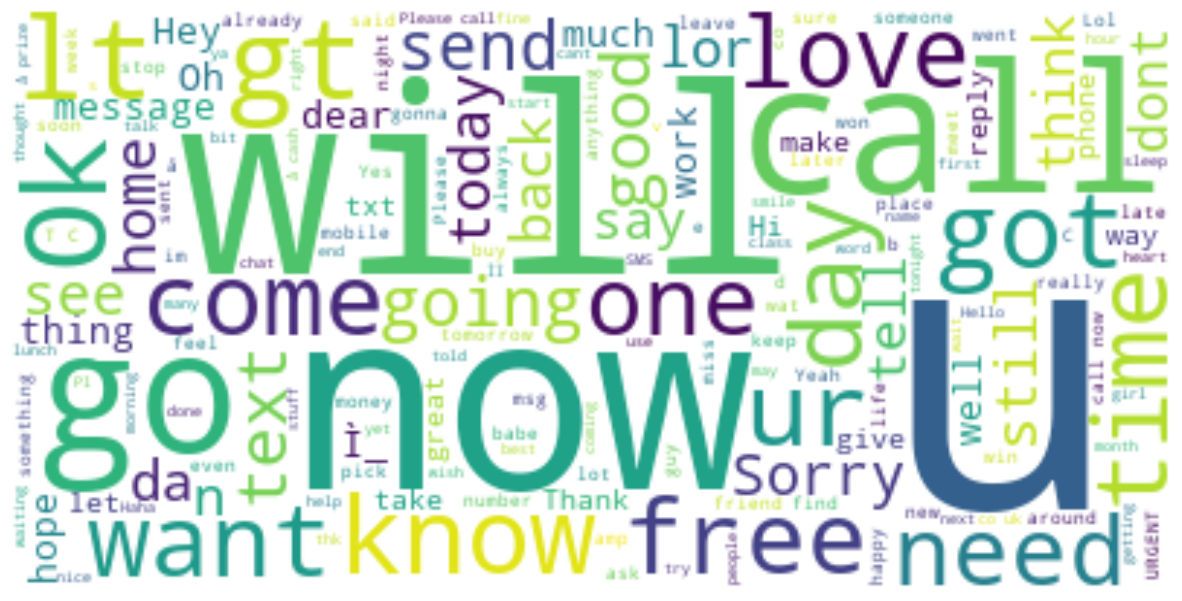

In [16]:
text = " ".join(i for i in data.text) # kết hợp các câu trong danh sách bằng khoảng trống
stopwords = set(STOPWORDS) # chuyển đổi danh sách các stop words này thành một tập hợp
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text) # tạo những từ dùng nhiều trong file
plt.figure( figsize=(15,10)) # chiều dài chiều rộng của ảnh
plt.imshow(wordcloud, interpolation='bilinear') # hiển thị word cloud đã tạo trước đó
plt.axis("off") #dòng này làm ẩn đi các trục x và y trên biểu đồ.
plt.show(); #Hàm này làm cho biểu đồ được vẽ trên figure hiển thị ra màn hình.

# Áp dụng thực tế

In [17]:
import requests # khai báo thư viện request
from bs4 import BeautifulSoup # Khai báo thư viện Beautifulsoup
import csv # Khai báo thư viện csv để đọc file csv

# URL của trang web cần cào dữ liệu
url = 'https://e.vnexpress.net/news/food-recipes/south-african-restaurant-introduces-vietnamese-cuisine-4718157.html'

# Gửi yêu cầu GET đến trang web và lấy nội dung HTML
response = requests.get(url)
html_content = response.text

# Phân tích nội dung HTML bằng BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Tìm các phần tử HTML chứa dữ liệu bạn muốn cào
# Ví dụ: lấy tiêu đề của các bài viết từ các thẻ <h2>
titles = soup.find_all('p')

# Tạo một danh sách các bài viết
data = []
for title in titles:
    data.append(title.text.strip())

# Ghi dữ liệu vào file CSV
with open('D:\\Advance Python\\data\\data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    # Viết tiêu đề cột (nếu cần)
    writer.writerow(['Title'])
    # Viết dữ liệu từ danh sách vào file CSV
    for item in data:
        writer.writerow([item])


                                               Title
0  Diners at Obento restaurant in Johannesburg, S...
1  According to the restaurant owner Ling Chiu, t...
2  She said that the idea of organizing such an e...
3  She said she wanted to arouse the memory of cu...
4  Dinners at the restaurant at this time had a c...


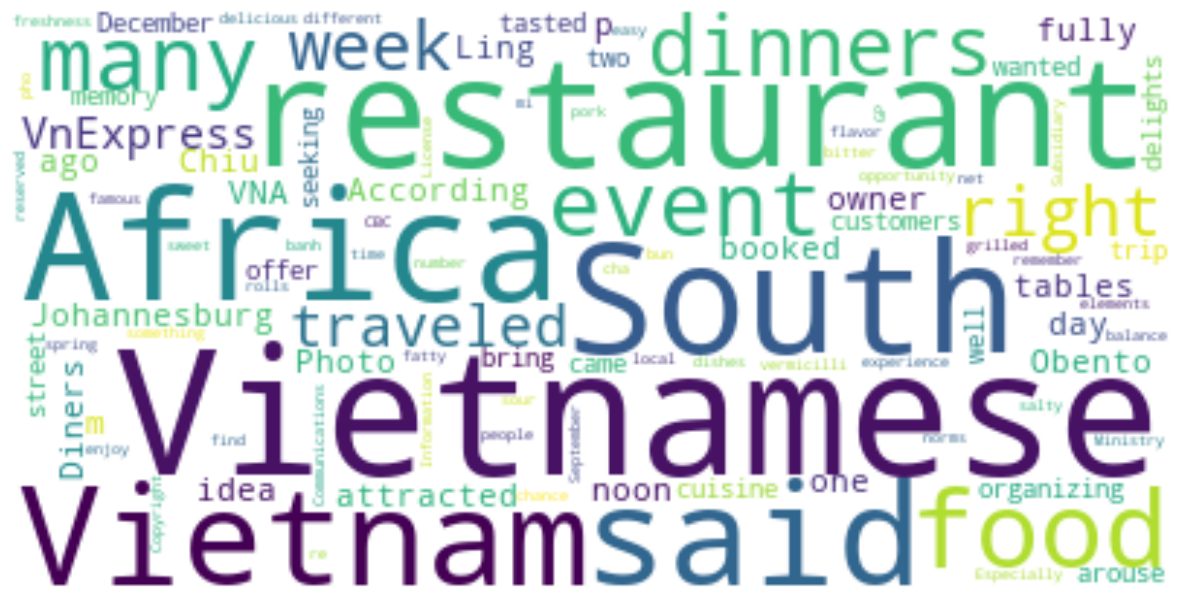

In [18]:
data = pd.read_csv("D:\\Advance Python\\data\\data.csv")
print(data.head())
text = ' '.join(str(i) for i in data['Title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear') # interpolation="bilinear" được sử dụng để cải thiện chất lượng của hình ảnh.
plt.axis("off")
plt.show()